# Пересечение отрезков
1) Уравнения (лобовой)
2) Методом взаимных положений
3) Методом плоского заметания (Бентли-Оттмана)

Отрезки:
1) (1, 1), (2, 5)
2) (2, 7), (5, -1)
3) (3, 4), (0, 5)
4) (3, 1), (2, 6)
5) (4, 8), (5, 0)

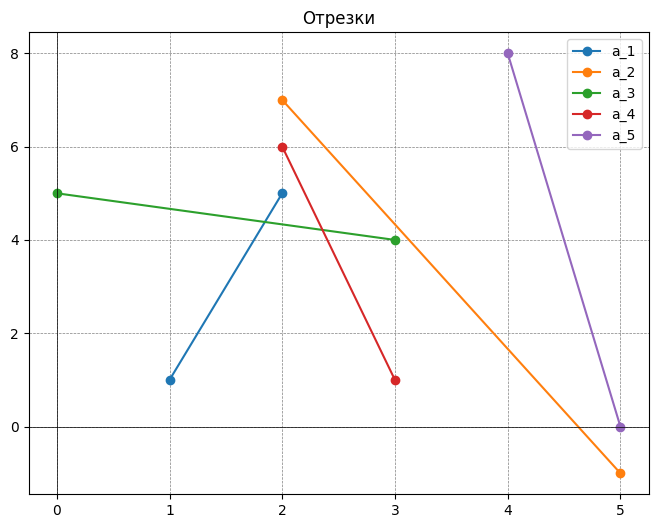

In [9]:
# Отрезки
import numpy as np
import matplotlib.pyplot as plt

segments = [
    (np.array([1, 1]), np.array([2, 5])),
    (np.array([2, 7]), np.array([5, -1])),
    (np.array([3, 4]), np.array([0, 5])),
    (np.array([3, 1]), np.array([2, 6])),
    (np.array([4, 8]), np.array([5, 0]))
]

plt.figure(figsize=(8, 6))
for i, (start, end) in enumerate(segments, start=1):
    plt.plot([start[0], end[0]], [start[1], end[1]], marker='o', label=f'a_{i}')

plt.title('Отрезки')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.legend()
plt.show()

In [11]:
# Задание 1

import numpy as np

def calculate_line_equation(start, end):
    if end[0] == start[0]:
        return None, start[0]
    k = (end[1] - start[1]) / (end[0] - start[0])
    b = start[1] - k * start[0]
    return k, b

def is_point_on_segment(point, start, end):
    return min(start[0], end[0]) <= point[0] <= max(start[0], end[0]) and \
        min(start[1], end[1]) <= point[1] <= max(start[1], end[1])

def find_intersection(k1, b1, k2, b2):
    if k1 == k2:
        return None
    if k1 is None:
        x = b1
        y = k2 * x + b2
    elif k2 is None:
        x = b2
        y = k1 * x + b1
    else:
        x = (b2 - b1) / (k1 - k2)
        y = k1 * x + b1
    return np.array([x, y])

def check_intersections(segments):
    intersections = []
    for i in range(len(segments)):
        for j in range(i + 1, len(segments)):
            start1, end1 = segments[i]
            start2, end2 = segments[j]
            k1, b1 = calculate_line_equation(start1, end1)
            k2, b2 = calculate_line_equation(start2, end2)
            intersection = find_intersection(k1, b1, k2, b2)
            if intersection is not None and \
                    is_point_on_segment(intersection, start1, end1) and \
                    is_point_on_segment(intersection, start2, end2):
                intersections.append((i + 1, j + 1, intersection))
    return intersections

intersections = check_intersections(segments)
print("Пересечения между:", intersections)

Пересечения между: [(1, 3, array([1.84615385, 4.38461538])), (3, 4, array([2.35714286, 4.21428571]))]


In [18]:
# Задание 2

# https://ru.stackoverflow.com/questions/936640/Пересечение-прямоугольников-python

def bounding_rectangle_intersects(start1, end1, start2, end2):
    return not (max(start1[0], end1[0]) < min(start2[0], end2[0]) or
                max(start2[0], end2[0]) < min(start1[0], end1[0]) or
                max(start1[1], end1[1]) < min(start2[1], end2[1]) or
                max(start2[1], end2[1]) < min(start1[1], end1[1]))

def vector_cross_product(v1, v2):
    return v1[0] * v2[1] - v1[1] * v2[0]

def check_segment_intersection(start1, end1, start2, end2):
    if not bounding_rectangle_intersects(start1, end1, start2, end2):
        return False

    d1 = end1 - start1
    d2 = end2 - start2
    d1_to_start2 = start2 - start1
    d1_to_end2 = end2 - start1
    d2_to_start1 = start1 - start2
    d2_to_end1 = end1 - start2

    cross1 = vector_cross_product(d1, d1_to_start2) # Смотрим со стороны первого отрезка
    cross2 = vector_cross_product(d1, d1_to_end2)
    cross3 = vector_cross_product(d2, d2_to_start1) # Начинаем уже смотреть со стороны второго отрезка
    cross4 = vector_cross_product(d2, d2_to_end1)

    if (cross1 * cross2 < 0) and (cross3 * cross4 < 0):
        return True

    return False

def check_all_intersections(segments):
    intersections = []
    for i in range(len(segments)):
        for j in range(i + 1, len(segments)):
            start1, end1 = segments[i]
            start2, end2 = segments[j]
            if check_segment_intersection(start1, end1, start2, end2):
                intersections.append((i + 1, j + 1))
    return intersections

intersections = check_all_intersections(segments)
print("Пересечения между:", intersections)

Пересечения между: [(1, 3), (3, 4)]
